# The SVD and Image Compression Exercise

### Suleyman Gozen
 
 I thank Yung-Hsu Tsui for his valuable comments.

In [1]:
import numpy as np
from scipy import linalg as la
import random
import matplotlib.pyplot as plt

In [2]:
'Problem 1'

def Compact_SVD(A):
    
    
    lamda, V = la.eig(A.conj().T @ A)
    sigma = np.sqrt(lamda)
    order = np.argsort(-sigma)
    sigma = sigma[order]
    V = V[order]
    r = sum(sigma != 0)
    sigma1 = sigma[:r]
    V1 = V[:,:r]
    U1 = A @ V1 / sigma1
    
    return U1, sigma1, V1.conj().T

In [3]:
A = np.random.rand(10,3)
U,s,Vh = Compact_SVD(A)
print(U.shape,s.shape,Vh.shape)

print(np.allclose(U.T @ U, np.identity(3)))
print(np.allclose(U @ np.diag(s) @ Vh, A))
print(np.linalg.matrix_rank(A) == len(s))

(10, 3) (3,) (3, 3)
False
True
True


In [4]:
'Problem 2'

def plot_circle(A):
    m,n = A.shape
    if (m!= 2) or (n!= 2):
        raise ValueError('The matrix is not 2 by 2!')
    
    u, s, vh = la.svd(A, full_matrices=True)
    
    x1 = np.cos(np.linspace(0,2*np.pi,200))
    y1 = np.sin(np.linspace(0,2*np.pi,200))
    S1 = np.vstack((x1,y1))
    E1 = np.array([[1, 0, 0],[0, 0, 1]])
    
    S2 = vh @ S1
    x2 = S2[0,:]
    y2 = S2[1,:]
    E2 = vh @ E1

    S3 = np.diag(s)@vh @ S1
    x3 = S3[0,:]
    y3 = S3[1,:]
    E3 = np.diag(s)@vh @ E1

    S4 = u @np.diag(s)@vh @ S1
    x4 = S4[0,:]
    y4 = S4[1,:]
    E4 = u @np.diag(s)@vh @ E1

    fig, axes = plt.subplots(m, n, figsize=(15, 15), sharex=True, sharey=True)
    
    axes[0, 0].plot(x1, y1, label='S')
    axes[0, 0].plot(E1[0,:], E1[1,:], label='S')

    
    axes[0, 1].plot(x2, y2, label='Vh * S')
    axes[0, 1].plot(E2[0,:], E2[1,:], label='Vh * S')
    
    axes[1, 0].plot(x3, y3, label='Sigma * Vh * S')
    axes[1, 0].plot(E3[0,:], E3[1,:], label='Sigma * Vh * S')
    
    axes[1, 1].plot(x4, y4, label='U * Sigma * Vh * S')
    axes[1, 1].plot(E4[0,:], E4[1,:], label='U * Sigma * Vh * S')

In [6]:
A = np.array([[3,1],[1,3]])
plot_circle(A)

In [7]:
'Problem 3'

def Trun_SVD(A,s1):
    
    
    u, s, vh = la.svd(A, full_matrices=True)
    
    r = sum(s != 0)
    
    if s1 > r:
        raise ValueError('Pick the value s that is less than the rank of A!')    
    
    m,n = A.shape
    
    
    s = np.diag(s)
    
    u_hat = u[:,:s1]
    s_hat = s[:s1,:s1]
    vh_hat = vh[:s1,:]
    n_entries = m*s1 + s1 + n*s1
    
    return u_hat,s_hat,vh_hat,n_entries

In [9]:
A = np.random.random((20, 20))
u_hat,s_hat,vh_hat,n_entries=Trun_SVD(A,7)
u, s, vh = la.svd(A, full_matrices=True)

In [10]:
n_entries

287

In [11]:
'Problem 4'

def Trun_SVD_mod(A,epsil):
    
    
    u, s, vh = la.svd(A, full_matrices=True)
       
    if epsil < np.min(s):
        raise ValueError('The value of epsilon is too small!')    
    
    r = sum(s != 0)
    
    m,n = A.shape
    n_s = len(s[s > epsil]) 
    
    s = np.diag(s)
    
    u_hat = u[:,:n_s]
    s_hat = s[:n_s,:n_s]
    vh_hat = vh[:n_s,:]
    n_entries = m*n_s + n_s + n*n_s
    
    return u_hat,s_hat,vh_hat,n_entries

In [12]:
A = np.random.random((20, 20))

In [13]:
u_hat,s_hat,vh_hat,n_entries=Trun_SVD_mod(A,2)
n_entries

123

In [14]:
s_hat

array([[ 10.06802258,   0.        ,   0.        ],
       [  0.        ,   2.35239432,   0.        ],
       [  0.        ,   0.        ,   2.12128931]])

In [15]:
# Test!
As = u_hat @ s_hat @ vh_hat
la.norm(A-As,2) < 2

True

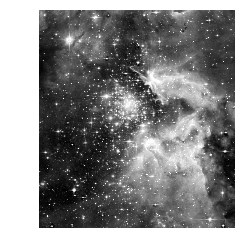

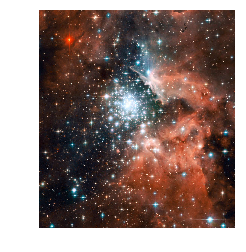

In [17]:
'Problem 5'

image_color = plt.imread("hubble.jpg") / 255
image_color.shape
red_layer = image_color[:,:,0]
plt.imshow(red_layer, cmap="gray")
plt.axis("off")
plt.show()

plt.imshow(image_color)
plt.axis("off")
plt.show()

In [18]:
def image_comp(s):
    image_original = plt.imread("hubble.jpg")/255
   
    if len(image_original)== 2:
        U,sigma,VH = Trun_SVD(image_original,s1)
        
    else:
        r = image_original[:,:,0]
        print(r.shape,s)
        g = image_original[:,:,1]
        b = image_original[:,:,2]
        X0,X1,X2,nr_entries = Trun_SVD(r,s)
        Y0,Y1,Y2,ng_entries = Trun_SVD(g,s)
        Z0,Z1,Z2,nb_entries = Trun_SVD(b,s)
        
               
        
        Ar =  X0@X1@X2
        Ag =  Y0@Y1@Y2
        Ab =  Z0@Z1@Z2
        As = np.dstack((Ar,Ag,Ab))
        As = np.clip(As, 0, 1)
        B = As.astype(float)
        
        fig, axes = plt.subplots(1, 2, figsize=(11, 5))
        axes[0].imshow(B)
        axes[1].imshow(image_original)
        
        n_compressed_entries = nr_entries+ng_entries+nb_entries
        
        print("The difference of number of entries between the original and compressed images is : ")
        print(image_original.size-n_compressed_entries )
        
        return n_compressed_entries ,image_original.size
        
image_comp(10)

(1158, 1041) 10
The difference of number of entries between the original and compressed images is : 
3550434


(66000, 3616434)